# Assignment Details:

 

The data set provided to you has a mix of customer reviews for products across categories and retailers.

 

We would like you to model on the data to bucket the future reviews in their respective topics (Note: A review can talk about multiple topics) and Overall polarity (positive/negative sentiment): 

Topics (Components, Delivery and Customer Support, Design and Aesthetics, Dimensions, Features, Functionality, Installation, Material, Price, Quality and Usability)
Polarity (Positive/Negative)
 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd

Loading the data

In [ ]:
dfReview = pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
dfReview.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


Let's analyze various columns in the Dataframe

In [ ]:
dfReview.dtypes

Id                                int64
Review                           object
Components                        int64
Delivery and Customer Support     int64
Design and Aesthetics             int64
Dimensions                        int64
Features                          int64
Functionality                     int64
Installation                      int64
Material                          int64
Price                             int64
Quality                           int64
Usability                         int64
Polarity                          int64
dtype: object

In [ ]:
dfReview.shape

(6136, 14)

As seen, there are over 6k reviews provided!

Let's see the distribution of topics for these reviews


In [ ]:
reviewDict = {}
for x in  dfReview._get_numeric_data().columns:
    if x == 'Id' or x == 'Polarity':
      continue
    else:
      print(x ,':', (dfReview[x].sum()))
      reviewDict[x] = dfReview[x].sum()

Components : 274
Delivery and Customer Support : 179
Design and Aesthetics : 650
Dimensions : 695
Features : 313
Functionality : 2538
Installation : 762
Material : 155
Price : 854
Quality : 2177
Usability : 1229


We get the count, but it would be more intuitive to visualize it!

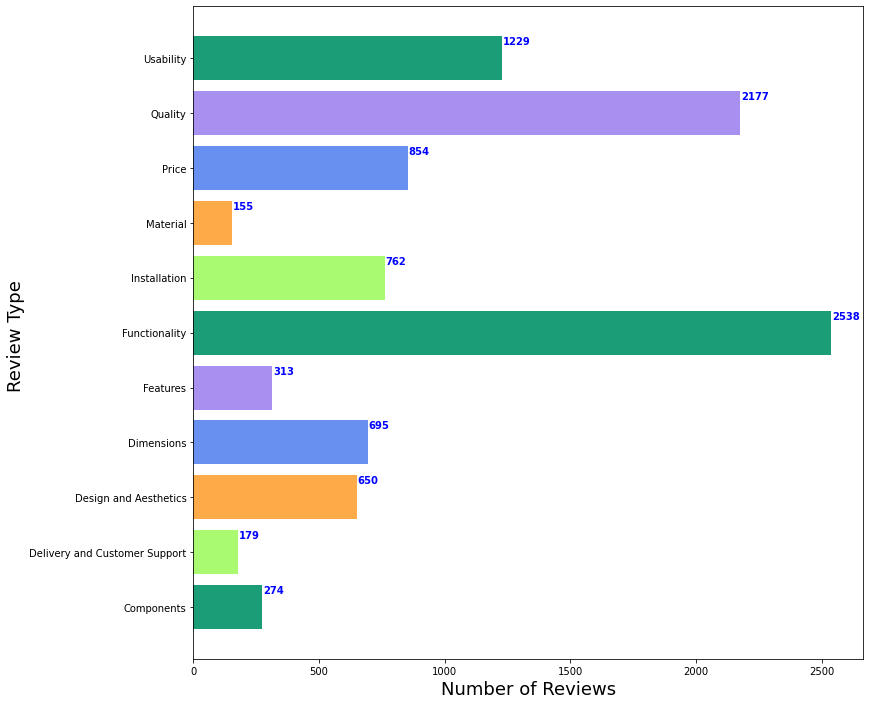

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
names = list(reviewDict.keys())
values = list(reviewDict.values())

fig, ax = plt.subplots(figsize=(12,12))

colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

bars = ax.barh(range(len(reviewDict)), values, tick_label=names, color=colors,align='center')
for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xlabel('Number of Reviews', fontsize=18)
plt.ylabel('Review Type ', fontsize=18)
plt.show()

From above chart, it can be easily inferred that category "Functionality" has the maximum reviews, followed by Quality. 

It seems people are more concerned about these aspects of a product!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


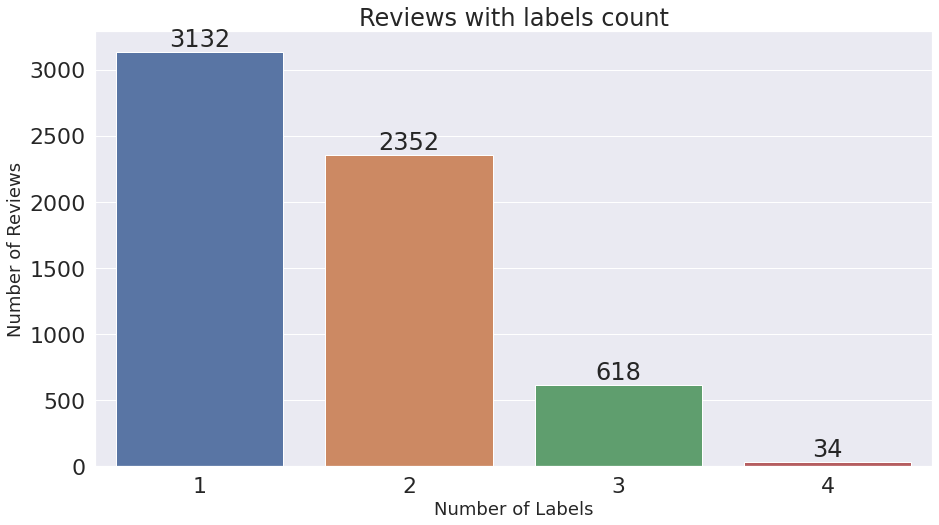

In [ ]:
# Following are the labels in the dataset
mlabels = ['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability']

rowSums = dfReview[mlabels].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Reviews with labels count")
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

It seems that we have many review with only 1 labels but We do have fairly large number of reviews with 2 labels as well!

# Polarity counts

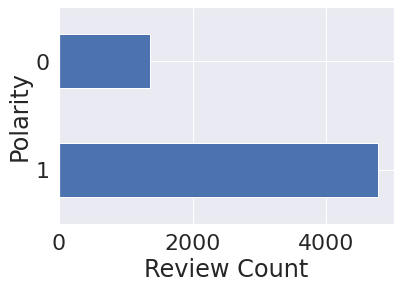

In [ ]:
dfReview['Polarity'].value_counts().plot(kind='barh')
plt.ylabel('Polarity')
plt.xlabel('Review Count')
plt.show()

Let's analyze the text w.r.t word count! Here, I am counting all the words and not getting rid of 'Stop words'. But, removal of stop words can also be done.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# The average number of all/unique entities per sentence.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
stop_words = set(stopwords.words('english'))

# def count_non_stop_words(essay):
#   word_tokens = word_tokenize(essay)
#   filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#   #str1 = ' '.join(filtered_sentence)
#   #mylist = re.findall(r'[^!?.,-;]+',str1) # To remove punctuations
#   #str1 = ''.join(mylist)
#   print(filtered_sentence)
#   return len(filtered_sentence)

import spacy
nlp = spacy.load('en_core_web_sm')

def count_all_words(essay):
  doc = nlp(essay)
  return len(doc)

In [ ]:
dfReview['Review'][0]

"For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking the toilet support design for some reason I'm very unhappy with his toilet never buy American standard again"

In [ ]:
dfReview['WordCount']  = dfReview.apply(lambda x: count_all_words(x['Review']), axis=1)  

In [ ]:
dfReview.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity,WordCount
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0,56
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1,26
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1,11
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1,13
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


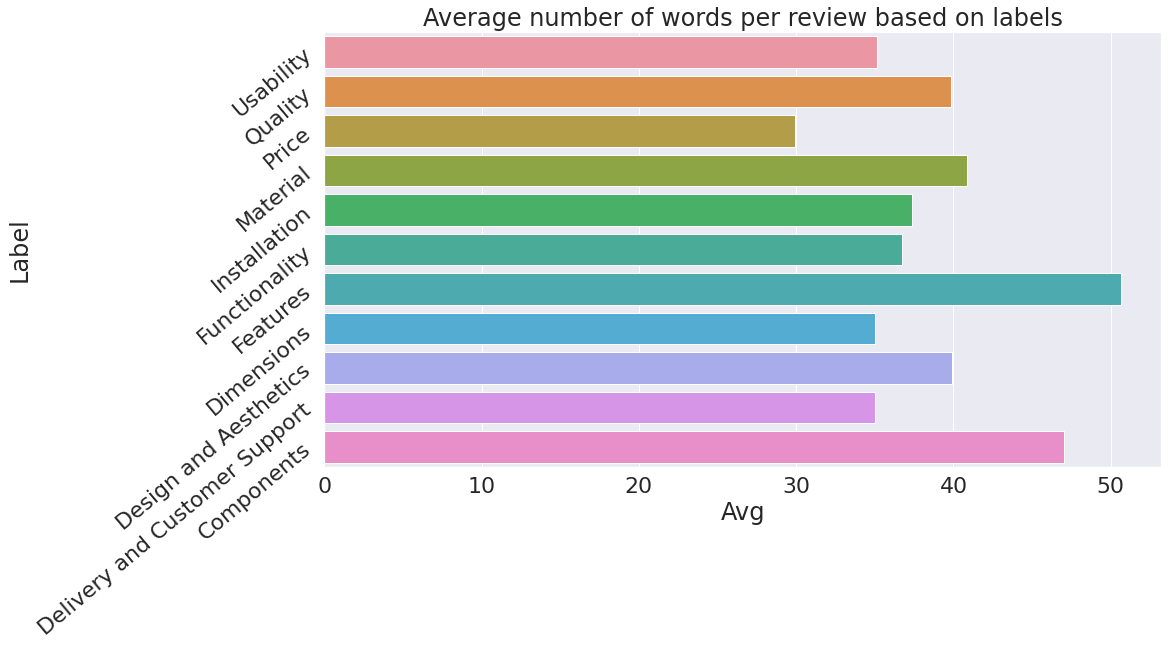

In [ ]:
def label_wise_avg_size(df):
    lbl_avg = pd.DataFrame()
    for col in mlabels:
        avg_review_length = df[df[col]==1]["WordCount"].mean()
        temp_df = pd.DataFrame([(col, avg_review_length)], columns=['Label', 'Avg'])
        lbl_avg = pd.concat([temp_df, lbl_avg])

    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(lbl_avg['Avg'],lbl_avg['Label'],orient='h')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")
    plt.title('Average number of words per review based on labels')
    plt.show()
    #return lbl_avg
label_wise_avg_size(dfReview)

It seems that when writing about 'Features' of a product, the number of words used are maximum which make sense!

The MOST used WORDS:


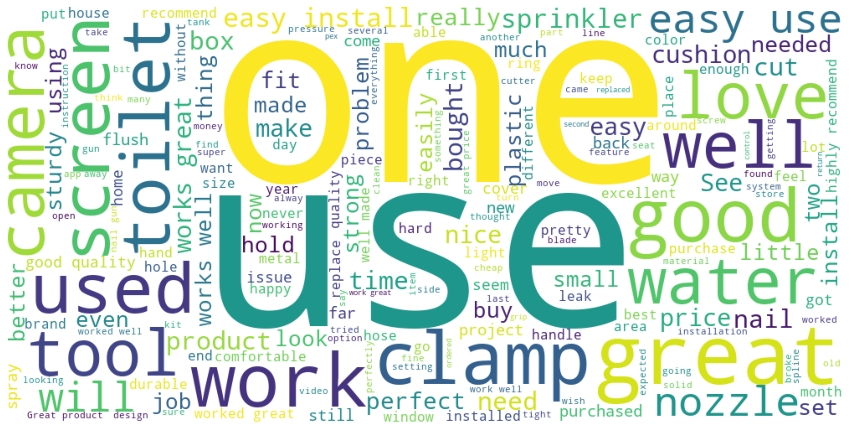

In [ ]:
#Building the word cloud for MOST used WORDS
from wordcloud import WordCloud

print("The MOST used WORDS:")
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(' '.join(dfReview['Review']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's also analyze among the different categories, how many are positive and how many are negatives!

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
def display_stack_bar(col1,col2,title,xlabel):
  #bins_created = np.arange(min(dfReview[col1])-buffer, max(dfReview[col1]) + buffer, binsize) 
  #print(bins_created)
  bins_created = [0,reviewDict[col1]]
  dfReview[col2] = pd.cut(dfReview[col1], bins=bins_created)
  dfReview.sort_values(by = col1,inplace=True)
  counts = dfReview.groupby([col2,'Polarity'],sort=False).Usability.count().unstack()
  dfReview.drop([col2], axis=1,inplace=True)
  counts.replace(np.nan,0,inplace=True)
  
  ax = counts.plot.bar(stacked=True,figsize=(10,10),width = 0.05)
  sns.set(font_scale = 2)
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            round(height,2), 
            horizontalalignment='center', 
            verticalalignment='center',
            rotation = 'vertical',fontsize='xx-small')  
  plt.title(title,fontsize=18)
  plt.xlabel(xlabel,fontsize=18)
  plt.xticks(fontsize=14,rotation=45)
  plt.ylabel('Number of Entries',fontsize=18)
  plt.show()	


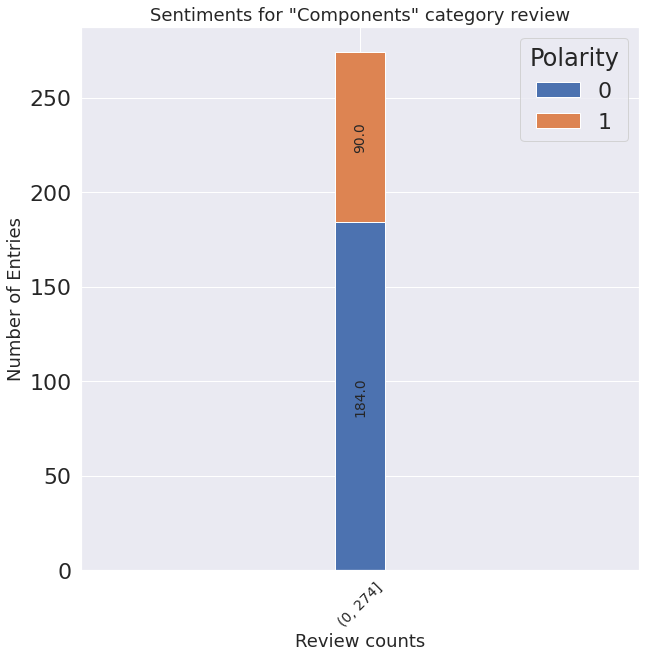

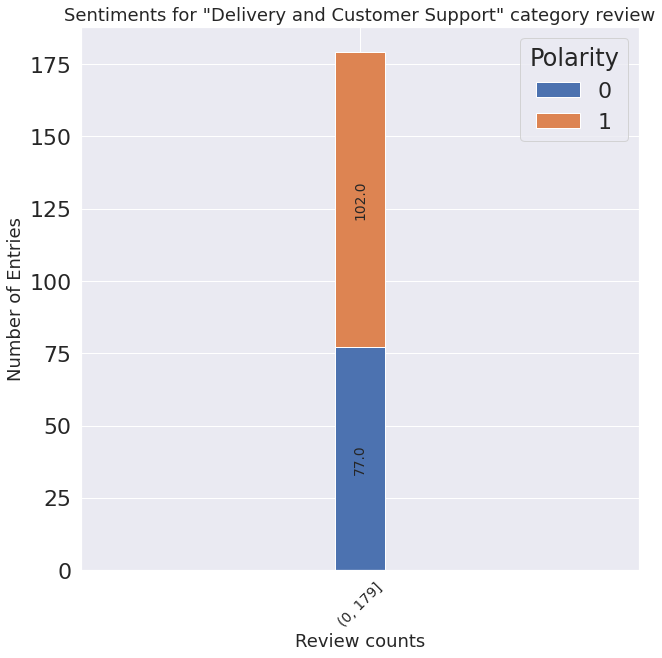

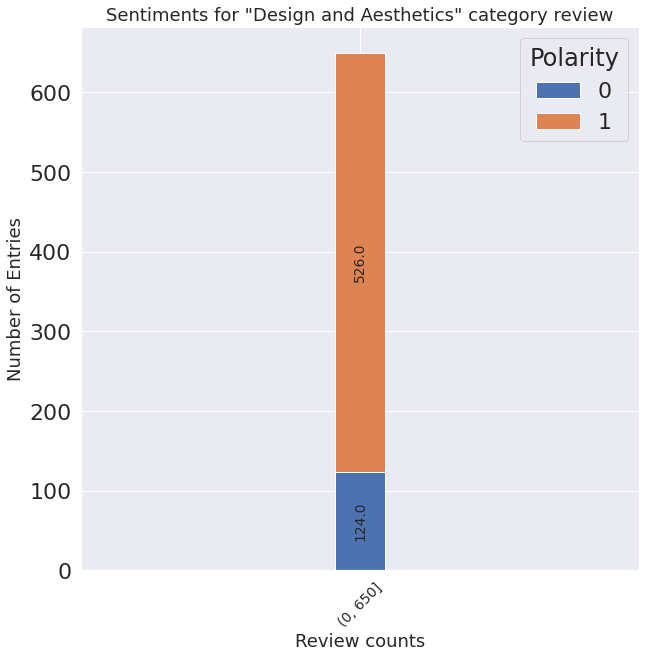

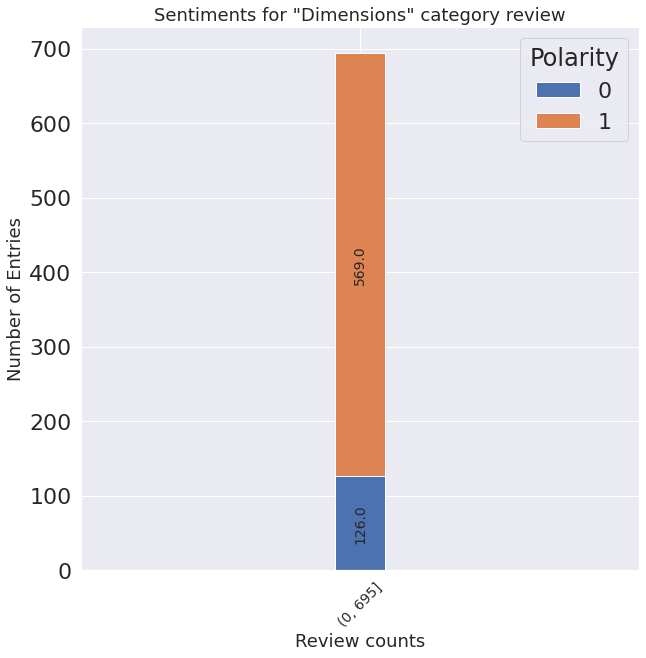

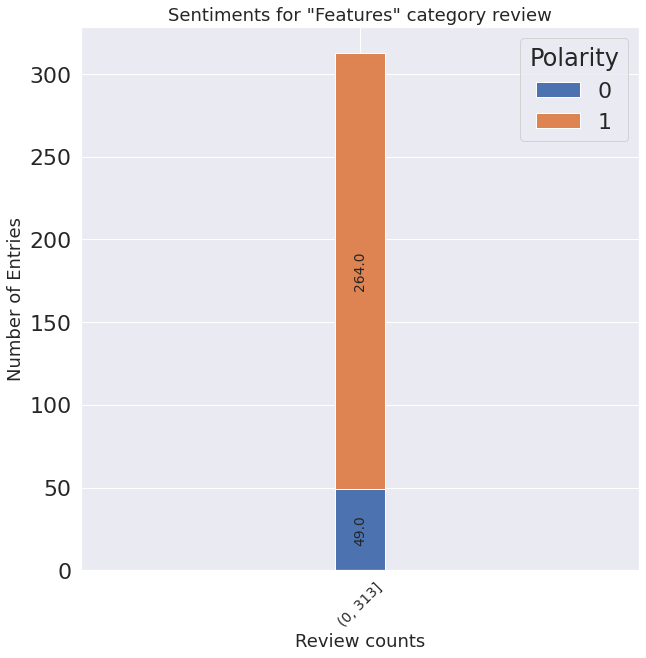

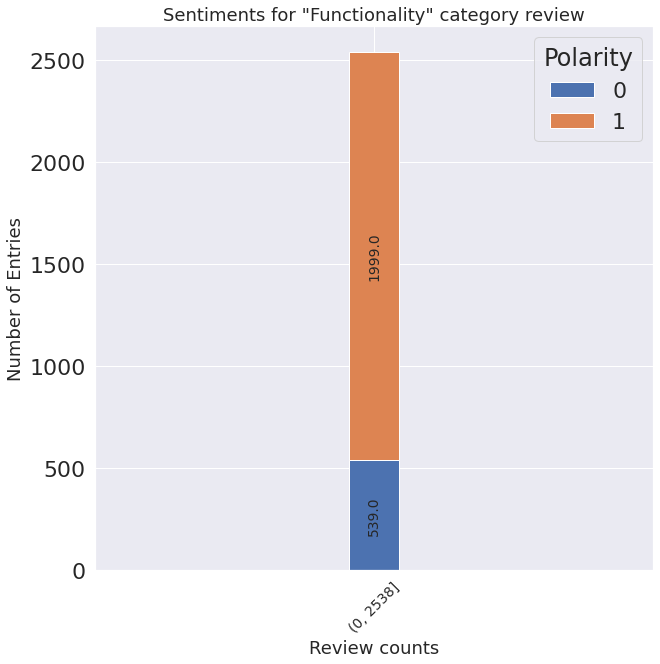

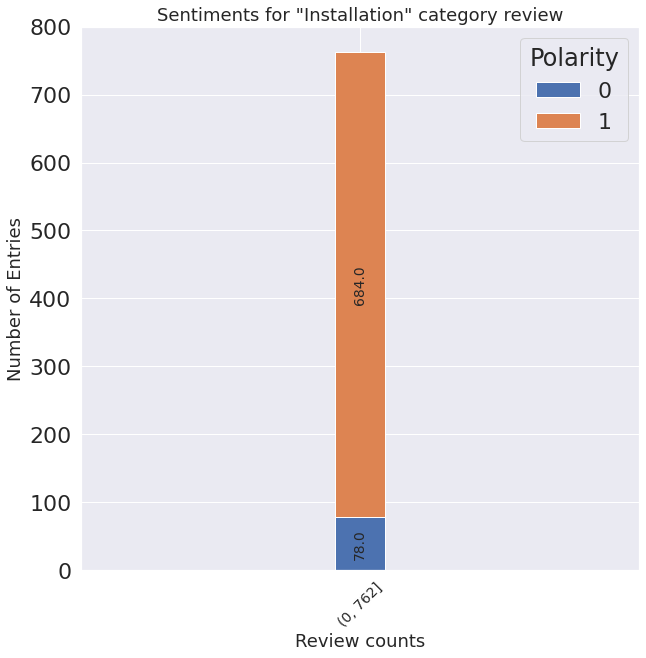

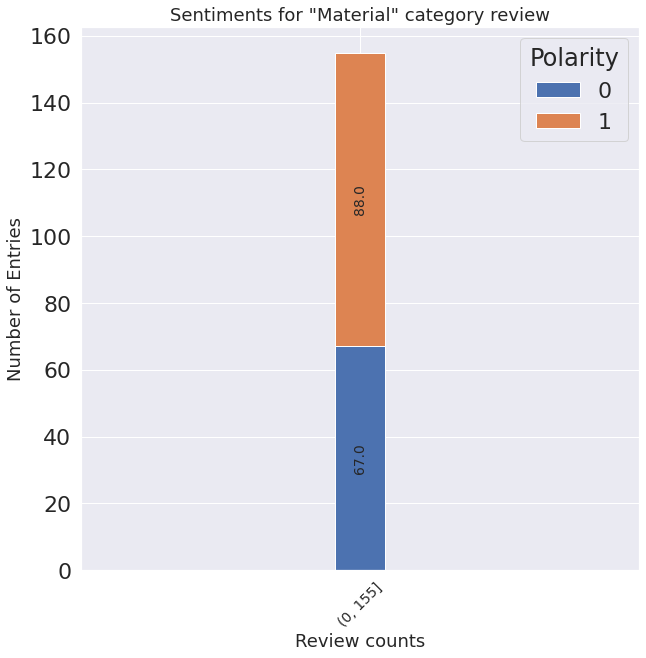

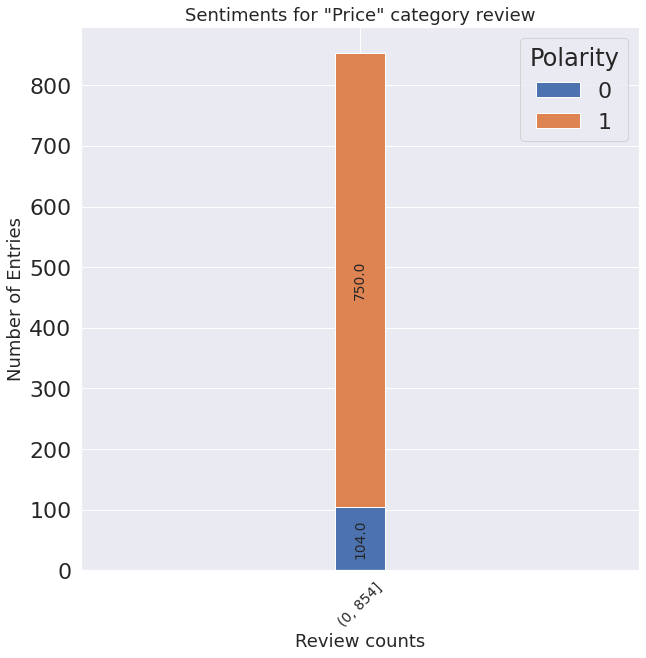

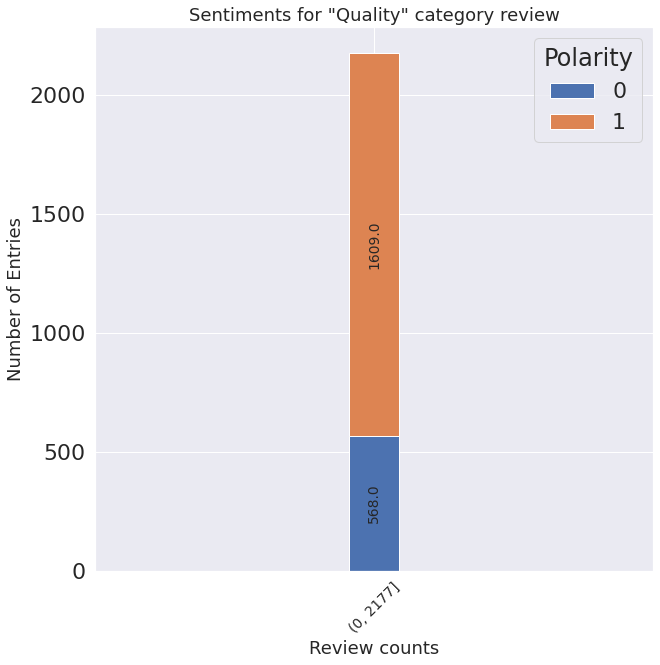

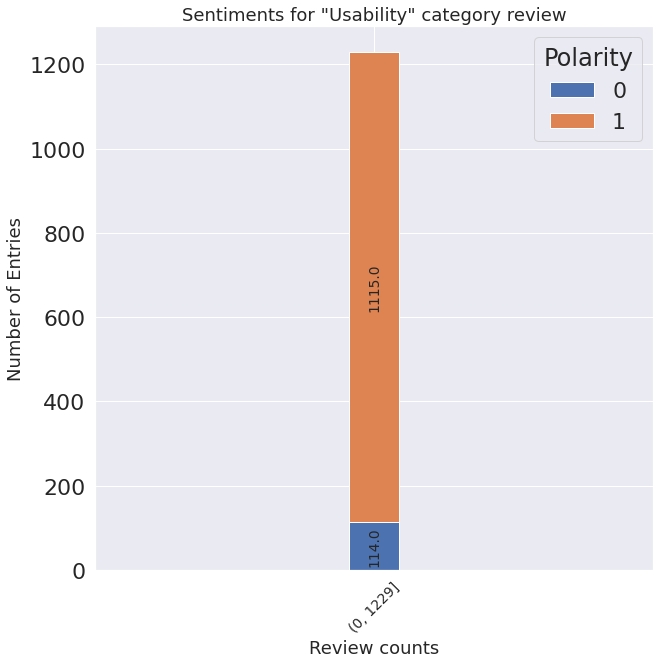

In [ ]:
for x in  dfReview._get_numeric_data().columns:
    #prinfting unique values
    if x == 'Id' or x == 'Polarity' or x == 'WordCount':
      continue
    else:
     display_stack_bar(x,x+'Sentiment','Sentiments for '+ '"'+ x + '"'+ ' category review','Review counts')
     print()


- As seen, '**Components'** review category is the only category which has more negative reviews than positive ones.

- For '**Material**' and '**Delivery  and Customer Support**' categories, the number of negative and positive reviews are balanced (almost equal in count).

- For rest of the cateogeries, the number of 'Positive' review count exceeds the number of 'Negative' review counts.



# Text preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
from textblob import TextBlob
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def processText(text):

    mylist = re.findall(r'[^!?.,-;]+',text) # To remove punctuations  
    str1 = ' '.join(mylist)

    # lemmatize the entire text
    # first, split the text to a list of words
    words = TextBlob(str1).words
    # then, lemmatize each word
    lemmatizedText = ""
    for w in words:
        lemmatizedText += "{} ".format(w.lemmatize())

    return lemmatizedText.strip()

In [ ]:
dfReview['ReviewCleaned'] = dfReview['Review'].apply(processText)


In [ ]:
print(dfReview[['Review','ReviewCleaned']].iloc[5:10].values)

[['We wanted to really like this highly recommended toilet. Unfortunately it is super loud when flushed and makes it hard to be in the same room.'
  'We wanted to really like this highly recommended toilet Unfortunately it is super loud when flushed and make it hard to be in the same room']
 ['Other than the camera works great and motion detection works great. However, there is no way to set up guest or another account to access particular cameras. Anyone wanting access to the camera also has to go through main account.'
  'Other than the camera work great and motion detection work great However there is no way to set up guest or another account to access particular camera Anyone wanting access to the camera also ha to go through main account']
 ['Thi small product has worked woderfully.  I like the available adjustments on it.'
  'Thi small product ha worked woderfully I like the available adjustment on it']
 ["So let me get this straight, Ring: I wanted a self-monitored home security

In [ ]:
dfReview.drop(['Id','Review','WordCount'],axis=1,inplace=True,errors='ignore')

In [ ]:
dfReview

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity,ReviewCleaned
3757,0,0,0,0,0,1,0,0,0,0,0,1,That pretty much sum it up My son bought these...
2891,0,0,0,0,0,1,0,0,0,0,0,1,Arlo camera work very well I used them persona...
1708,0,0,0,0,0,1,0,0,0,0,0,1,Great nail Worked well with my rigid nail gun
5295,0,0,1,0,0,1,0,0,0,0,0,0,FAULTY DESIGN The external sensor the one with...
4667,0,0,0,0,0,0,0,1,0,0,0,0,Although the seat cushion is thick it is not d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0,0,0,0,0,0,0,0,1,0,1,1,Easy to use Great value for the price
5656,0,0,0,0,0,0,0,0,1,1,1,1,So far it 's been durable and easy to use whil...
1707,0,0,0,0,0,0,0,0,1,0,1,1,Easy to maneuver hose with this attachment Lik...
4466,0,0,0,1,0,0,0,0,0,1,1,1,Love these I use them on a variety of project ...


Above, we have performed review's preprocessing by lemmatizing, removing punctuations.

# Data and Model building.
# For training and inference, we can use DistilBERT.


In [ ]:
selected_columns = dfReview[['ReviewCleaned']]
new_df = selected_columns.copy()

In [ ]:
new_df

,ReviewCleaned
3757,That pretty much sum it up My son bought these...
2891,Arlo camera work very well I used them persona...
1708,Great nail Worked well with my rigid nail gun
5295,FAULTY DESIGN The external sensor the one with...
4667,Although the seat cushion is thick it is not d...
...,...
4030,Easy to use Great value for the price
5656,So far it 's been durable and easy to use whil...
1707,Easy to maneuver hose with this attachment Lik...
4466,Love these I use them on a variety of project ...


In [ ]:
new_df['labels'] = dfReview.iloc[:,:-1].values.tolist()

In [ ]:
new_df.head()

,ReviewCleaned,labels
3757,That pretty much sum it up My son bought these...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]"
2891,Arlo camera work very well I used them persona...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]"
1708,Great nail Worked well with my rigid nail gun,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]"
5295,FAULTY DESIGN The external sensor the one with...,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4667,Although the seat cushion is thick it is not d...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.2 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 47.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.1 MB/s 
     |████████████████████████████████| 880 kB 45.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=19924971c7f57694760230ce1acb9f8406511a2cf2bc63aba530c49c12aaccf4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel

In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 12
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
class MultiLabelDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.ReviewCleaned
        self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_dataset=new_df.sample(frac=train_size,random_state=200)
test_dataset=new_df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

# training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
# testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

FULL Dataset: (6136, 2)
TRAIN Dataset: (4909, 2)
TEST Dataset: (1227, 2)


In [ ]:
training_set = MultiLabelDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_dataset, tokenizer, MAX_LEN)
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
#num_classes = len(new_df.labels[0])
num_classes = 12
class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
model = DistilBERTClass()
model.to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_featu

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

NameError: ignored

In [ ]:
def train_model(epoch):
    model.train()
    for _, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        
        outputs = model(ids, mask)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%1000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
    train_model(epoch)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch: 0, Loss:  0.7067440748214722
Epoch: 1, Loss:  0.2877950370311737
Epoch: 2, Loss:  0.1687925159931183
Epoch: 3, Loss:  0.123677097260952
Epoch: 4, Loss:  0.1158386692404747
Epoch: 5, Loss:  0.05974879860877991
Epoch: 6, Loss:  0.035732805728912354
Epoch: 7, Loss:  0.033608175814151764
Epoch: 8, Loss:  0.0335569903254509
Epoch: 9, Loss:  0.044285379350185394
Epoch: 10, Loss:  0.007487169466912746
Epoch: 11, Loss:  0.01284256111830473


In [ ]:
def predictions(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            #token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask,)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
import shutil, sys   
def save_ckp(state, checkpoint_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)

In [ ]:
outputs, targets = predictions(testing_loader)
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

F1 Score (Micro) = 0.8674865754373808
F1 Score (Macro) = 0.7399648976764039


# Saving the model checkpoints!

In [ ]:
import os

checkpoint_path = '/content/gdrive/MyDrive/DistilBertModelClassification.pt'
# create checkpoint variable and add important data
checkpoint = {
      'epoch': epoch + 1,
      'state_dict': model.state_dict(),
      'optimizer': optimizer.state_dict()
}
  
  # save checkpoint
save_ckp(checkpoint, checkpoint_path)

NameError: ignored

In [ ]:
# import torch
# model=torch.load(r"/content/gdrive/MyDrive/DistilBertModelClassification.pt",map_location=device)

In [ ]:
checkpoint = torch.load('/content/gdrive/MyDrive/DistilBertModelClassification.pt') # ie, model_best.pth.tar
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
model.to(device)

DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_featu

# Inference from the model


In [ ]:
list(dfReview.columns.values[:-1])

NameError: ignored

In [ ]:
#categoriesList = list(dfReview.columns.values[:-1])
categoriesList = ['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability']

In [ ]:
print(dfReview['ReviewCleaned'][91])

The best tool I 've probably ever purchased brand new for Works great Definitely would recommend


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import numpy as np
def getInference(text):
  tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
  encoded_input = tokenizer(text, return_tensors='pt').to(device)
  output = model(**encoded_input)
  prediction = torch.sigmoid(output).cpu().detach().numpy().tolist()
  pred = np.array(prediction) >= 0.5

  if pred[0][-1:]:          # if the last label is True
    ret1 = 'Review is Positive!'
    #print('Review is Positive!')
  else:
    ret1 = 'Review is Negative!'
    #print('Review is not positive!')
  
  a = pred[0][:-1]
  b = categoriesList

  result = [y for x, y in zip(a, b) if x]
  ret2 = 'Review belongs to the category ' + '"'+  ','.join(result)+'"'
  
  return ret1,ret2
  #print('Review belongs to the category ' + '"'+  ','.join(result)+'"')


  

In [ ]:
text = "I really liked this product. From usability perspective its certainly very good!. Highly recommended!'"
r1,r2 = getInference(text)

print(r1)
print(r2)

Review is Positive!
Review belongs to the category "Quality"


In [ ]:
text = "Very bad product. Quality is very bad"
getInference(text)

Review is not positive!
Review belongs to the category "Quality"


In [ ]:
text = "Not recommended at all. Material is of poor standard"
getInference(text)

Review is Positive!
Review belongs to the category "Material"


In [ ]:
text = "There was no instruction in the package but it was still easy to installed. And works great."
getInference(text)

Review is Positive!
Review belongs to the category "Functionality,Installation"


In [ ]:
text = '''
I purchased multiple cameras to help me figure out some cat elimination issues. These were very helpful to figure out trends and gather information about my cats bowel movements. I had one on each room the litter boxes were in, and one where she has been going when she doesn't want to use a box.The field of view is great! Mounting options awesome! The camera is on a stiff ball base that can adjust the view of the camera.Night view is pretty awesome! Works incredibly well.Motion detection is pretty good, except for the black cat (ironically the one with issues). The motion sensors seem to have a hard time picking her up.I'm overall impressed with these cameras hardware.Ring app is also pretty good! I'm bummed out it's paid, but they do store the videos on a remote server, so I don't really penalize a fee. Intuitive, many many customizable setup options, great product.
'''
getInference(text)


Review is Positive!
Review belongs to the category "Features,Functionality"


In [ ]:
text = "Worst ever!Delivery sucks big time!!'"
getInference(text)

Review is not positive!
Review belongs to the category "Delivery and Customer Support"


In [ ]:
text = "I have never seen such as bad design in my life. Not recommended at all. Please escalate my complaint!"
getInference(text)

Review is not positive!
Review belongs to the category "Design and Aesthetics,Quality"


In [ ]:
text = "I have never seen such as good design in my life. totally recommended . Please dont escalate my complaint!"
getInference(text)

NameError: ignored

In [ ]:
pip install flask_ngrok

In [ ]:
pip install pyngrok

     |████████████████████████████████| 745 kB 5.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=819d58e12a370cf30b2ed2dba3040ba9037a4cb1b48d0508f302293299bf21c1
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
!ngrok authtoken 22PJMsI1m7iGI76gpmxR4Z2yyHm_HzeA6PQme8h54syeC9wJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import logging
from flask import Flask, request, jsonify, url_for, render_template
import uuid
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__,template_folder='/content/gdrive/MyDrive/IMDBPredictions/templates',
            static_folder='/content/gdrive/MyDrive/IMDBPredictions/static')
run_with_ngrok(app)   #starts ngrok when the app is run
gunicorn_logger = logging.getLogger('gunicorn.error')
app.logger.handlers = gunicorn_logger.handlers
app.logger.setLevel(gunicorn_logger.level)

Expected = {
    "Review":{"min":1,"max":2000}
}

@app.route('/')
def indexes():
  
  return render_template('ProductReview.html')


@app.route('/submitted', methods=['POST'])
def submitted():
  content = request.form['text']
  errors = []

  sample_example = [content]
  r1,r2 = getInference(sample_example)

  return render_template('ProductReview.html',prediction=  r1 +' ' + r2 )

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9cd5-35-222-175-59.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/May/2022 07:19:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:15] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/May/2022 07:19:16] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:31] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:19:33] "GET /submitted HTTP/1.1" 405 -
127.0.0.1 - - [04/May/2022 07:26:42] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:26:54] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:27:48] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:28:22] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:28:44] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:29:04] "POST /submitted HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2022 07:

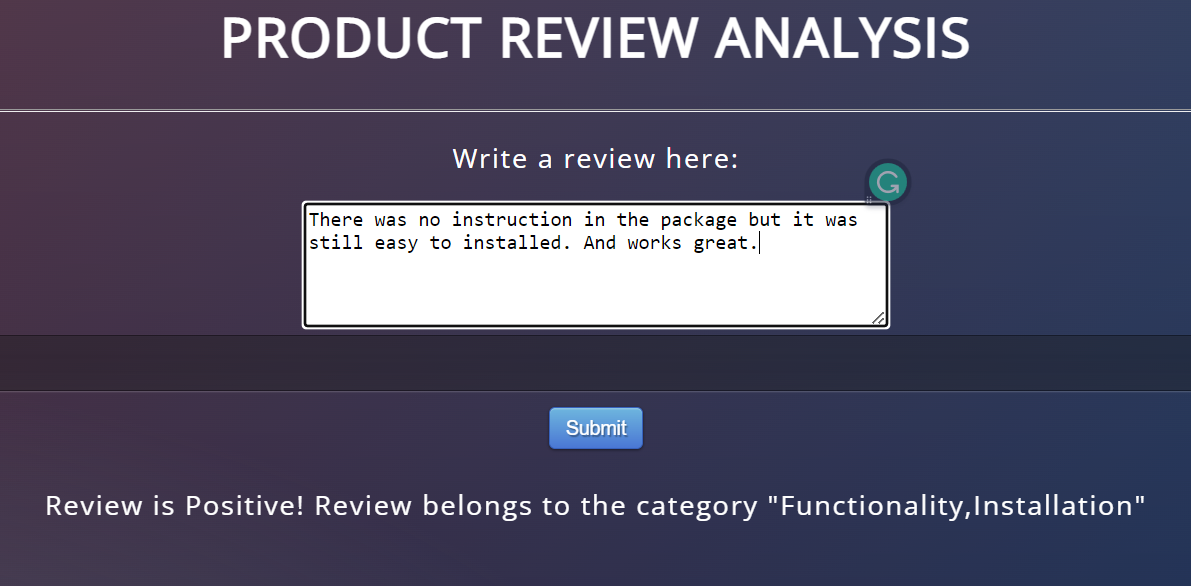